# Titanic - EDA

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load the csv file
df=pd.read_csv('titanic_train.csv')


# Fill or drop missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# #clean data:
# df = df.dropna(subset=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

# #Analyzing the number of male passengers vs number of female
# type_counts = df['Sex'].value_counts()
# plt.figure(figsize=(6,4))
# plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
# plt.title('Number of males Vs Number of Female Passengers')
# plt.xlabel('Gender')
# plt.ylabel('Number of paggengers')
# plt.tight_layout()
# plt.show()

# #survived vs Gender
# survival_by_gender = df.groupby('Sex')['Survived'].mean()*100
# plt.bar(survival_by_gender.index, survival_by_gender.values, color=['pink', 'blue'])
# plt.title('Survival Rate by gender')
# plt.xlabel('Gender')
# plt.ylabel('Survival Rate(%)')
# plt.tight_layout()
# plt.show()

# #survived vs pclass
# survival_by_pclass = df.groupby('Pclass')['Survived'].mean()*100
# plt.pie(survival_by_pclass.values, 
#     labels=survival_by_pclass.index, 
#     colors=['green', 'blue', 'orange'], 
#     autopct='%1.1f%%')
# plt.title('Survival Rate by Pclass')
# plt.show()

# #survived vs age
# survival_by_age = df.groupby('Age')['Survived'].mean()*100
# plt.hist(survival_by_age, bins=20, alpha=0.5, color='skyblue', edgecolor='black')
# plt.title('Surviaval Rate by Age')
# plt.xlabel('Age')
# plt.ylabel('Survival Rate')
# plt.tight_layout()
# plt.show()

# #survived vs fare -- histogram


In [34]:
# Quick overview
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

In [35]:
# Check for missing values
print('Checking missing values:\n',df.isnull().sum())

Checking missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [138]:
# Basic Data Exploration
print('Survived Count:\n',df['Survived'].value_counts())     # 0 = Died, 1 = Survived
print('Pclass Count:\n',df['Pclass'].value_counts()) 
print('Pclass Count:\n',df['Age'].value_counts())      # Passenger classes
print('Gender Count:\n',df['Embarked'].value_counts())          # Male/Female ratio

Survived Count:
 Survived
0    549
1    342
Name: count, dtype: int64
Pclass Count:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass Count:
 Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64
Gender Count:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


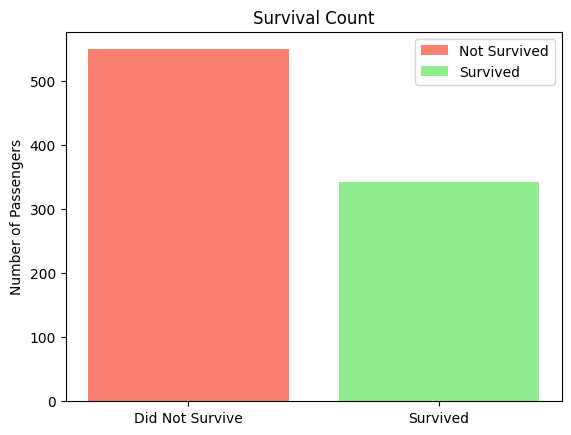

In [ ]:
#Survival Count using bar plot
Survival_counts= df['Survived'].value_counts()
plt.bar(Survival_counts.index, Survival_counts.values, color=['salmon', 'lightgreen'], label=('Not Survived', 'Survived'))
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('Survival Count.png')
plt.show()

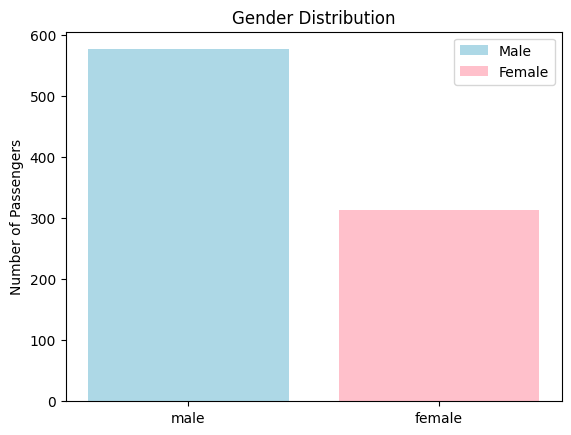

In [148]:
# Gender Count

Gender_counts= df['Sex'].value_counts()
plt.bar(Gender_counts.index, Gender_counts.values, color=['lightblue', 'pink'], label=('Male', 'Female'))
plt.title('Gender Distribution')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('Gender-Count.png')
plt.show()

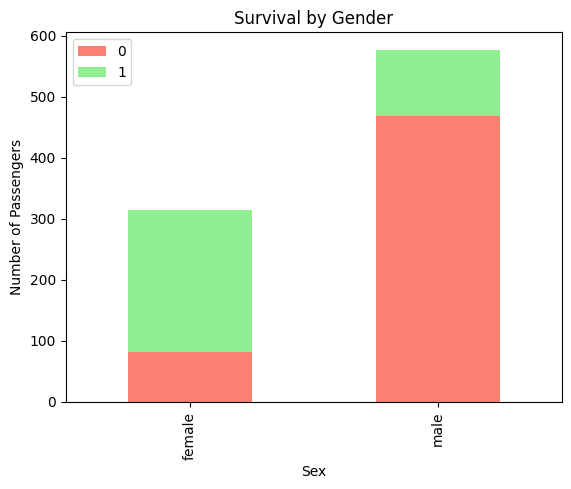

In [149]:
# Survival by gender
survival_by_sex = df.groupby('Sex')['Survived'].value_counts().unstack()
survival_by_sex.plot(kind='bar', stacked=True, color=['salmon','lightgreen'])   # 0 = Died, 1 = Survived
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('Survival By Gender.png')
plt.show()

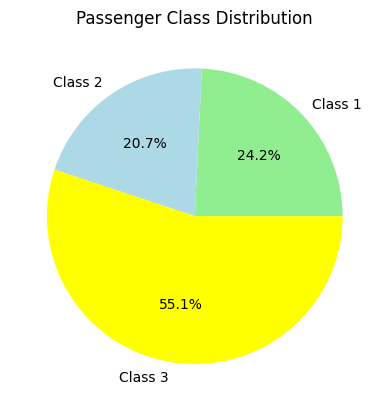

In [150]:
# Passenger Class Distribution

Class_counts= df['Pclass'].value_counts().sort_index().dropna()
plt.pie(Class_counts.values, colors=['lightgreen', 'lightblue', 'yellow'], labels=('Class 1', 'Class 2', 'Class 3'), autopct='%1.1f%%')

plt.title('Passenger Class Distribution')
plt.savefig('Pclass Count.png')
plt.show()

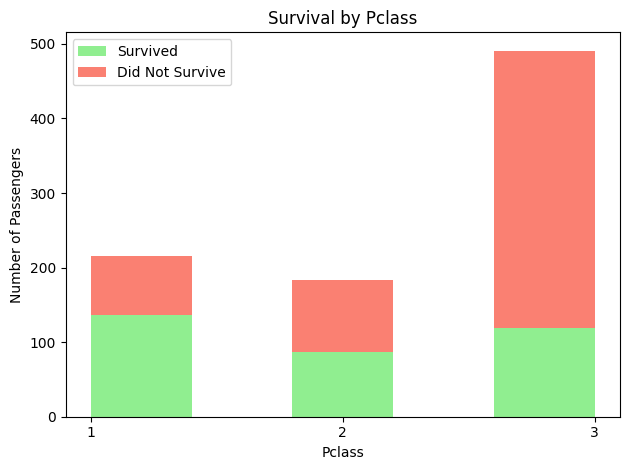

In [151]:
# Survival by class

plt.hist([df[df['Survived']==1]['Pclass'].dropna(), df[df['Survived']==0]['Pclass'].dropna()],
        bins=5, stacked=True, color=['lightgreen', 'salmon'], label=['Survived', 'Did Not Survive'])
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend()
plt.xticks([1, 2, 3])
plt.tight_layout()
plt.savefig('Survival By Pclass.png')
plt.show()

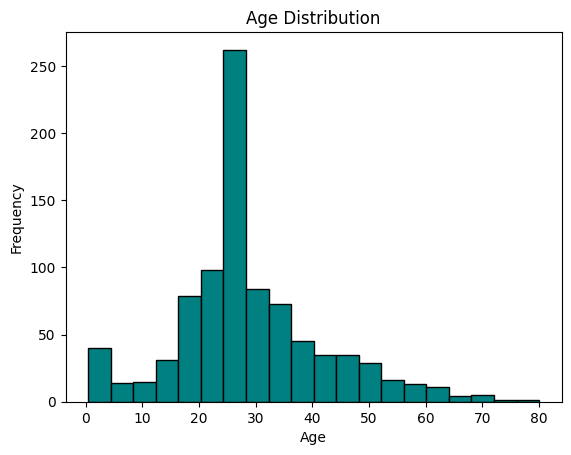

In [152]:
# Age Distribution
df['Age'].dropna().plot(kind='hist', bins=20, color='teal', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Age Count.png')
plt.show()

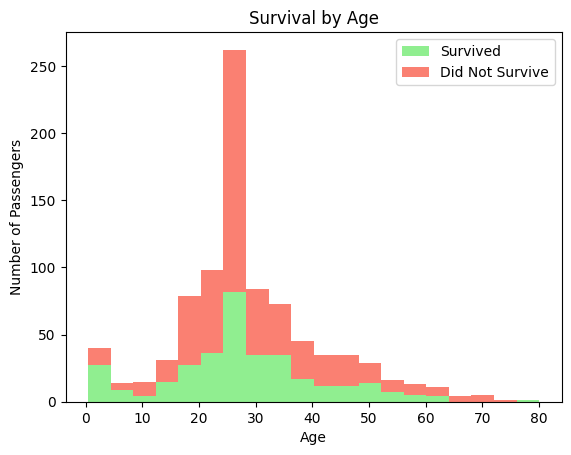

In [153]:
# Survival by Age
plt.hist([df[df['Survived']==1]['Age'].dropna(), df[df['Survived']==0]['Age'].dropna()],
        bins=20, stacked=True, color=['lightgreen', 'salmon'], label=['Survived', 'Did Not Survive'])
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('Survival By Age.png')
plt.show()

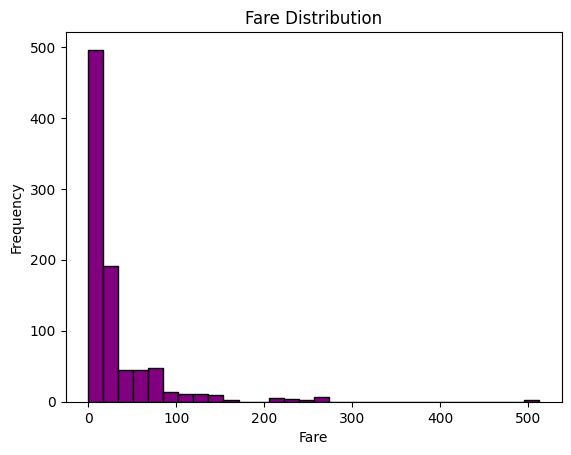

In [154]:
#Fare Distribution
df['Fare'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.savefig('Fare Count.png')
plt.show()

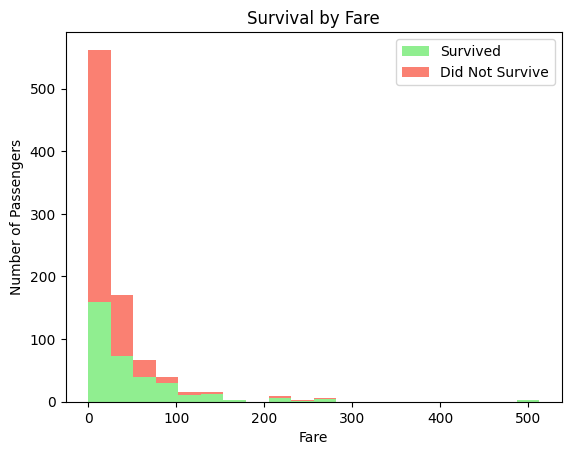

In [155]:
# Survival by Fare
plt.hist([df[df['Survived']==1]['Fare'].dropna(), df[df['Survived']==0]['Fare'].dropna()],
        bins=20, stacked=True, color=['lightgreen', 'salmon'], label=['Survived', 'Did Not Survive'])
plt.title('Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('Survival By Fare.png')
plt.show()

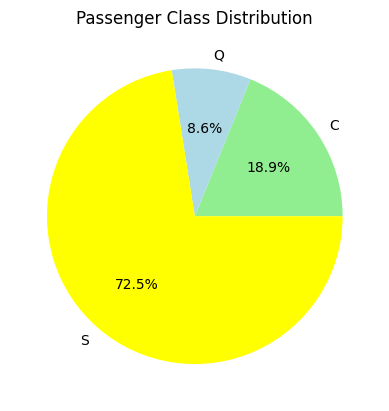

In [156]:
# Embarked Count
Class_counts= df['Embarked'].value_counts().sort_index().dropna()
plt.pie(Class_counts.values, colors=['lightgreen', 'lightblue', 'yellow'], labels=('C', 'Q', 'S'), autopct='%1.1f%%')

plt.title('Passenger Class Distribution')
plt.savefig('Embarked Count.png')
plt.show()

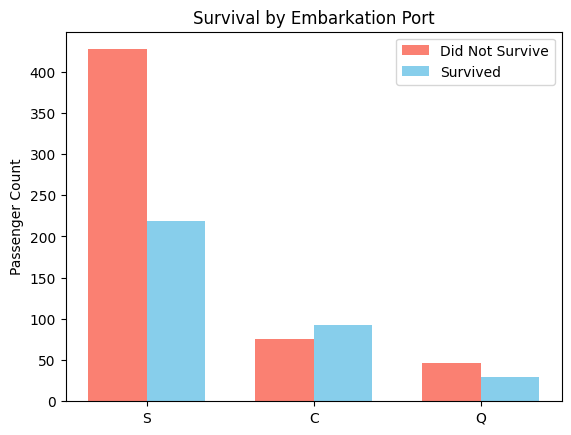

In [157]:
#Survival by Embarkation Port
embarked = df['Embarked'].dropna().unique()
survived_counts = [df[(df['Embarked'] == port) & (df['Survived'] == 1)].shape[0] for port in embarked]
not_survived_counts = [df[(df['Embarked'] == port) & (df['Survived'] == 0)].shape[0] for port in embarked]

x = np.arange(len(embarked))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, not_survived_counts, width, label='Did Not Survive', color='salmon')
ax.bar(x + width/2, survived_counts, width, label='Survived', color='skyblue')

ax.set_xticks(x)
ax.set_xticklabels(embarked)
ax.set_ylabel('Passenger Count')
ax.set_title('Survival by Embarkation Port')
ax.legend()
plt.savefig('Survival By Embarked.png')
plt.show()
